由于Day 8中已经对数据进行分析处理过，今天不再赘述。为了方便后续操作和理解，我们借助AI将heart.csv数据集的列标题改为中文
# 特征名中文映射

In [3]:
import pandas as pd

data = pd.read_csv('heart.csv')

# 医学特征中英文映射字典
medical_feature_map = {
    "age": "年龄",
    "sex": "性别",
    "cp": "胸痛类型",
    "trestbps": "静息血压",  # 单位：mm Hg（毫米汞柱）
    "chol": "血清胆固醇浓度",  # 单位：mg/dl（毫克/分升）
    "fbs": "空腹血糖",  # 单位：mg/dl，通常以120mg/dl为分界，大于120mg/dl为1
    "restecg": "静息心电图结果",
    "thalach": "最大心率",
    "exang": "运动诱发心绞痛",
    "oldpeak": "运动相对静息的ST段压低",  # 单位：mV（毫伏）
    "slope": "ST段峰值斜率",
    "ca": "荧光检查显示的主要血管数量",  # 0-3支
    "thal": "地中海贫血症状态",
    "target": "患病目标变量"  # 通常1=患病，0=正常
}

data_cn = data.rename(columns=medical_feature_map)
data_cn.head()

,年龄,性别,胸痛类型,静息血压,血清胆固醇浓度,空腹血糖,静息心电图结果,最大心率,运动诱发心绞痛,运动相对静息的ST段压低,ST段峰值斜率,荧光检查显示的主要血管数量,地中海贫血症状态,患病目标变量
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---


# 相关系数热力图

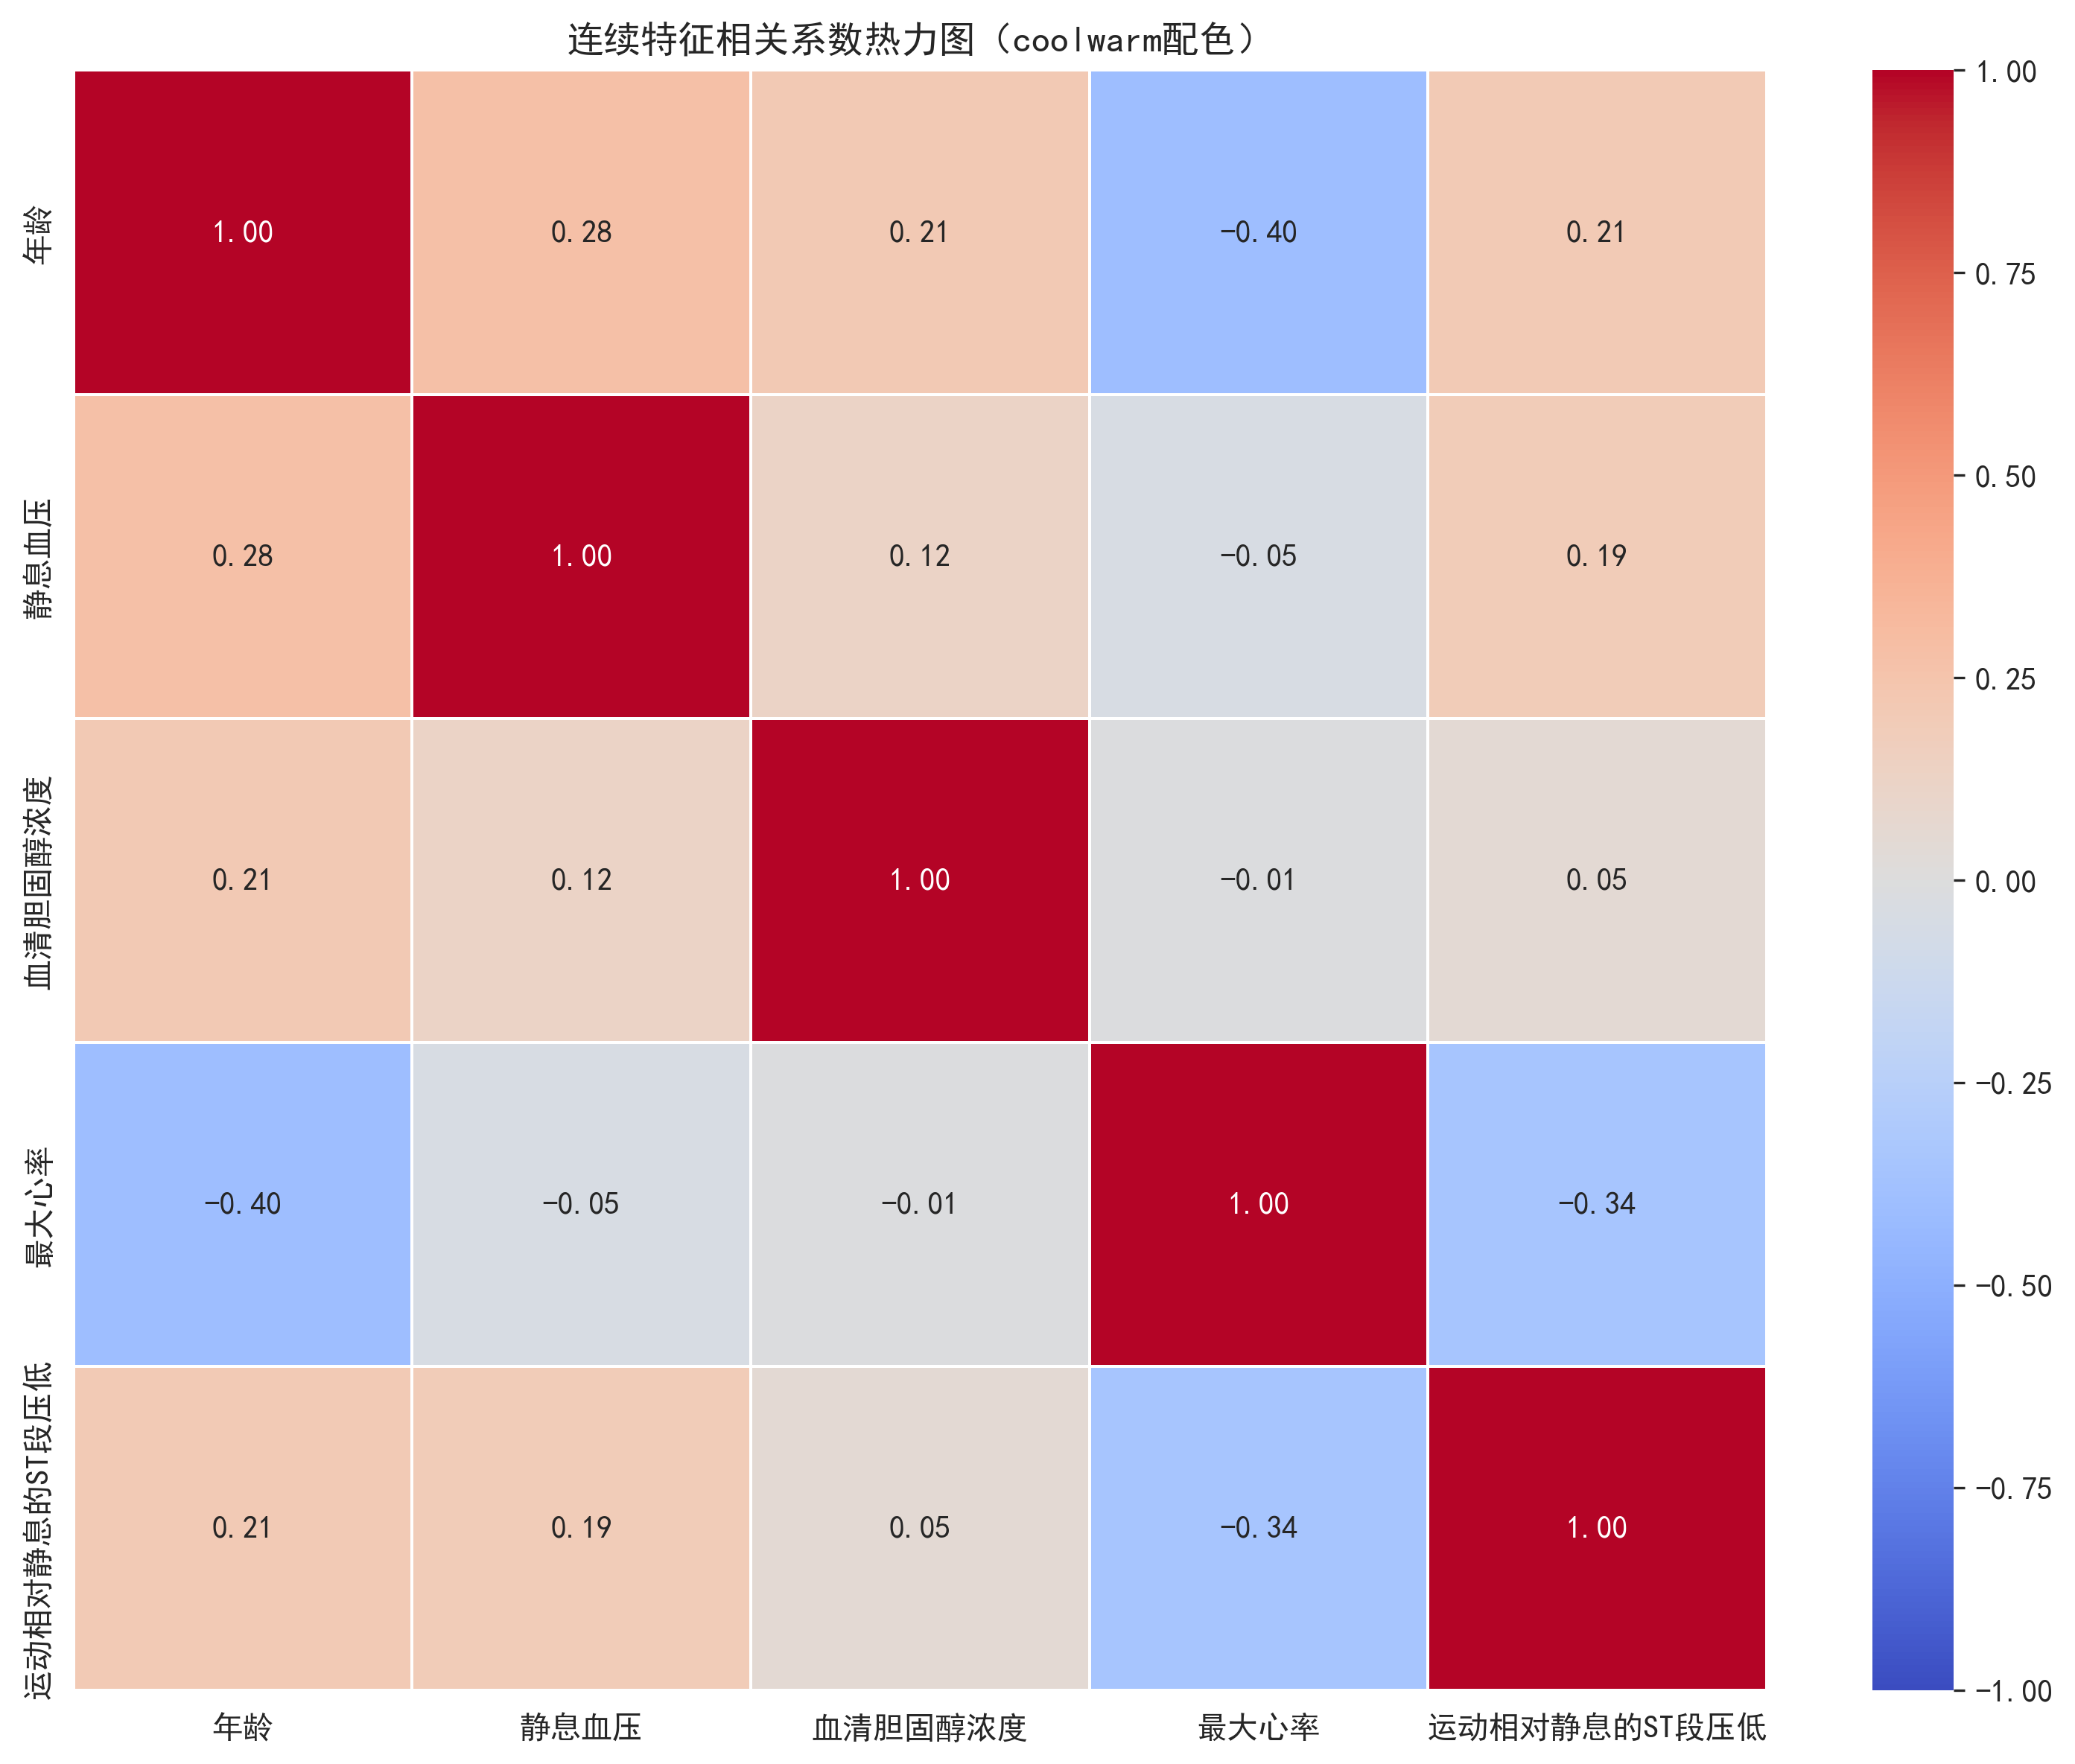

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features_cn = ['年龄', '静息血压', '血清胆固醇浓度', '最大心率', '运动相对静息的ST段压低']

# 计算相关系数矩阵
correlation_matrix = data_cn[continuous_features_cn].corr()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('连续特征相关系数热力图（coolwarm配色）')
plt.tight_layout()
plt.show()

---


# 子图绘制
## 单特征
### 连续变量


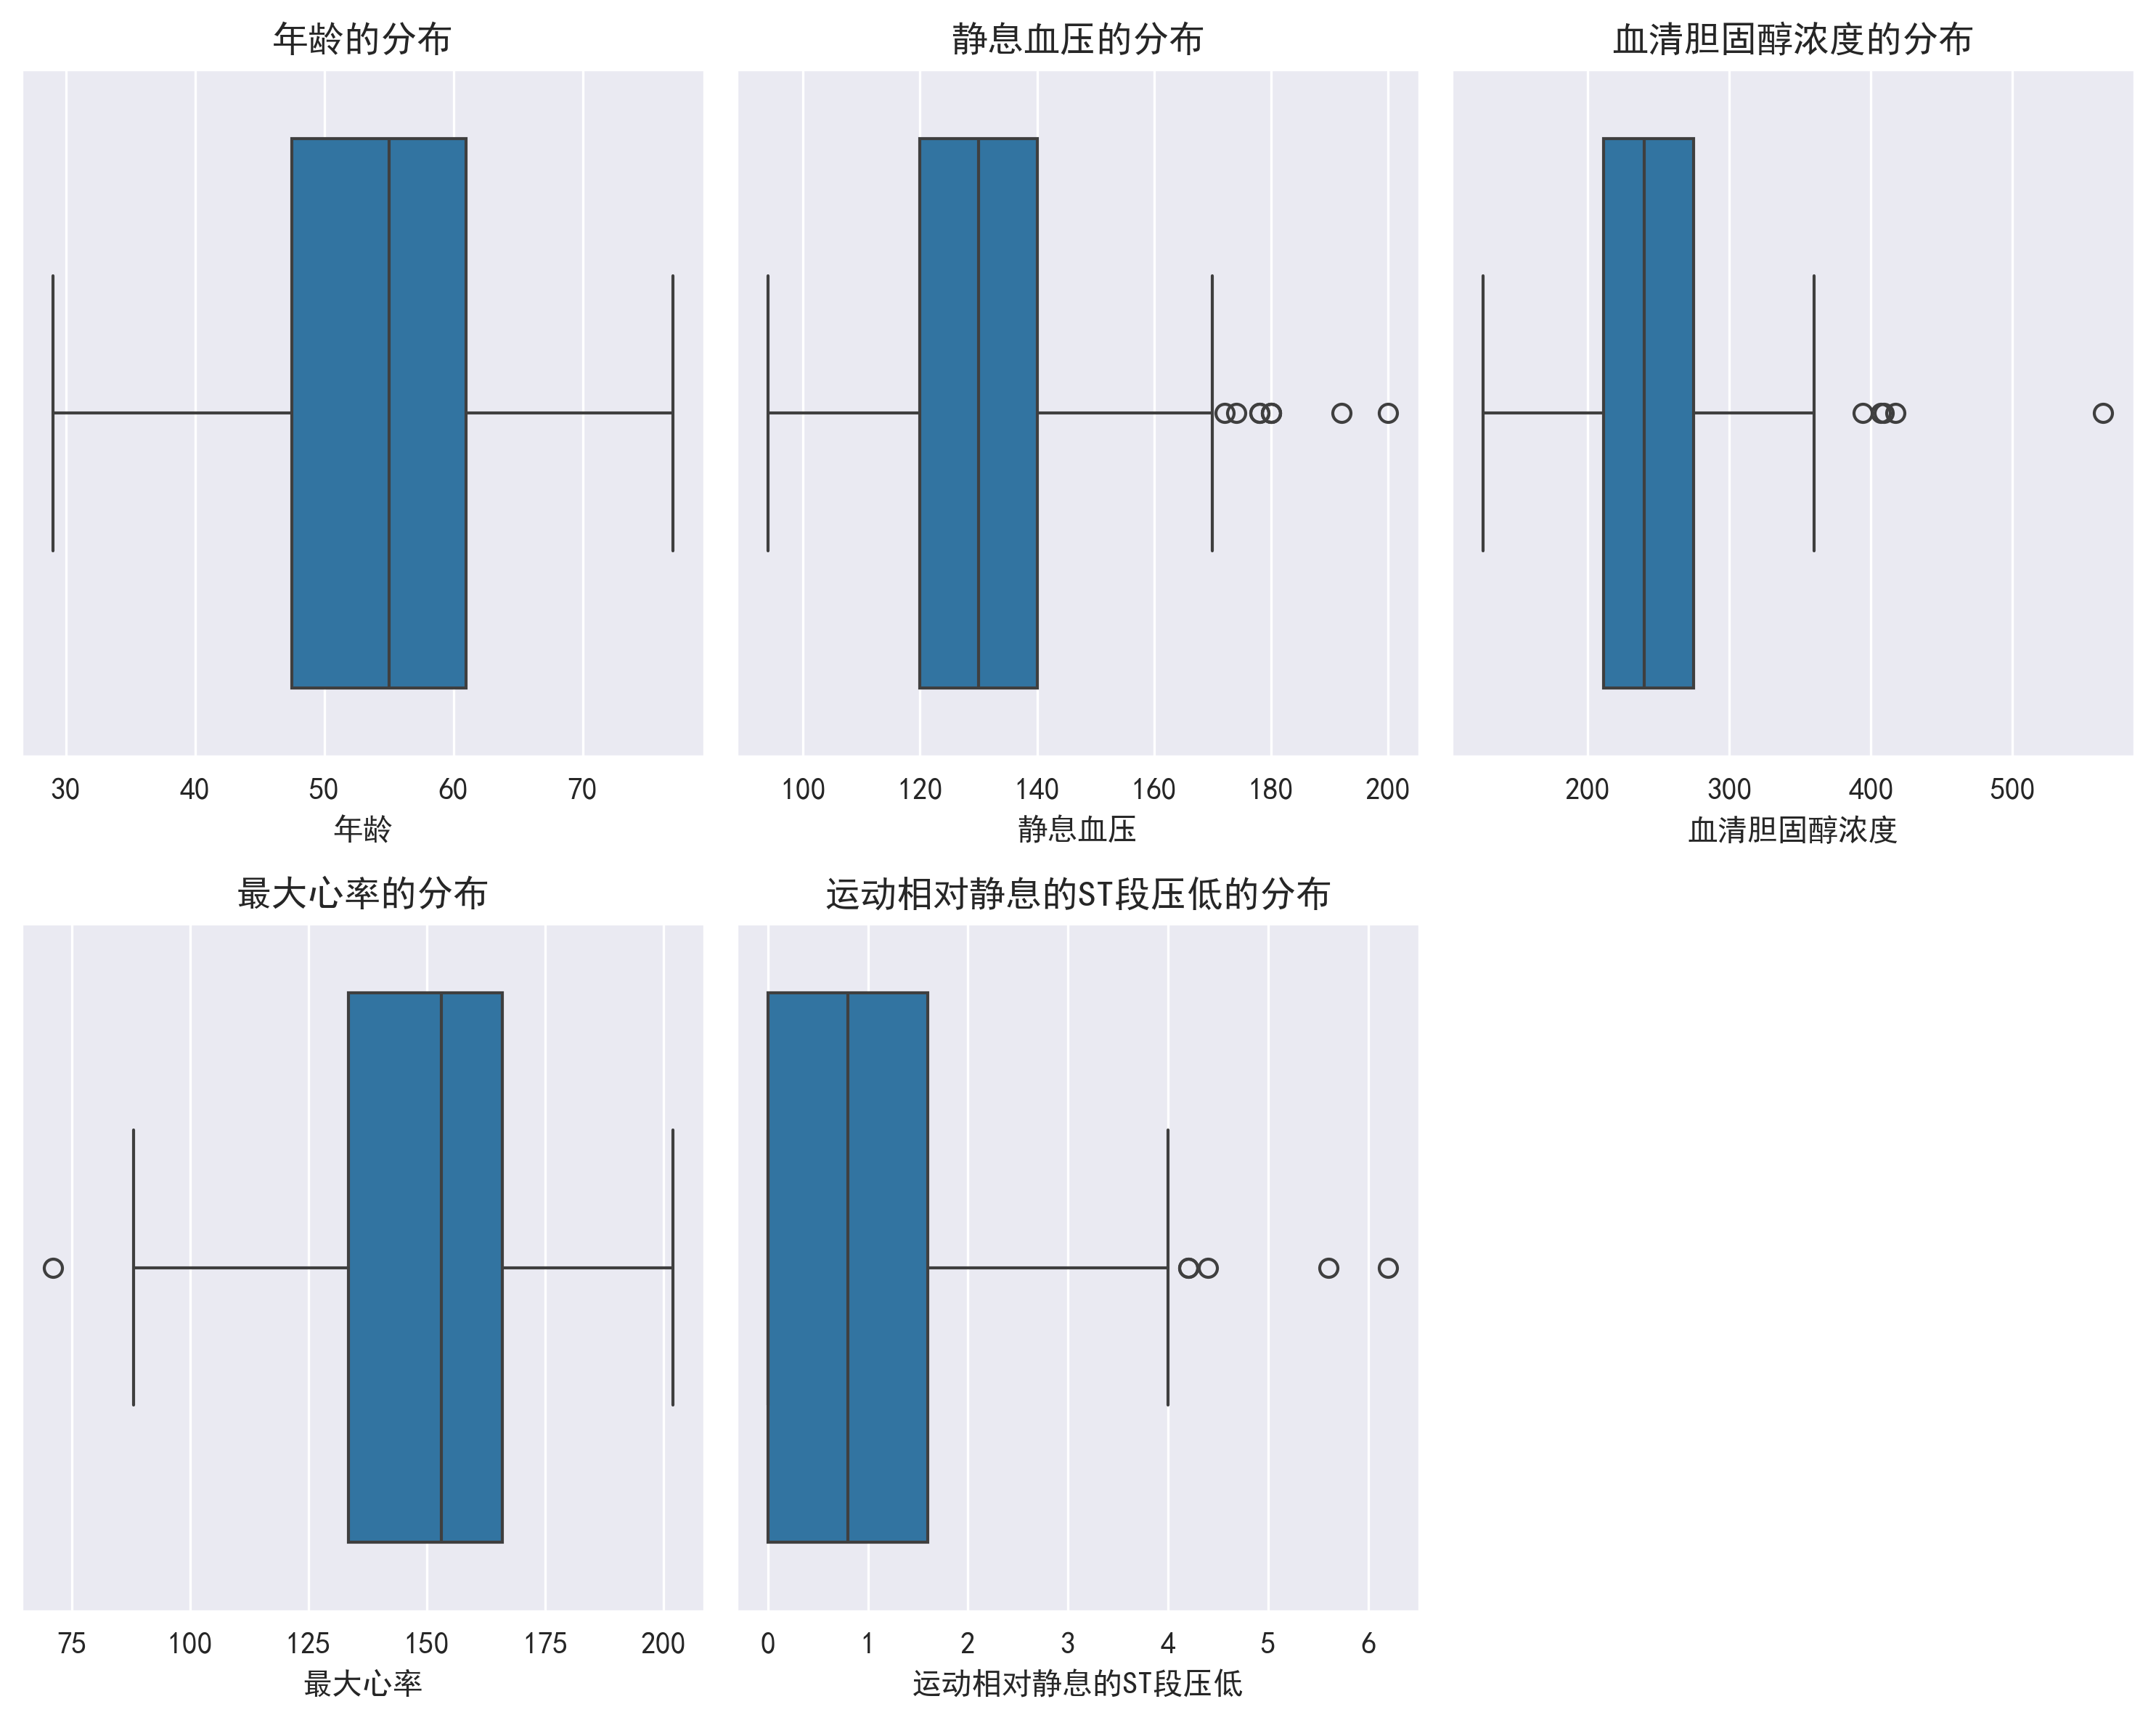

In [18]:
n_features = len(continuous_features_cn)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # 向上取整，或者math.ceil(n_features / n_cols)
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(10, 4 * n_rows),
    dpi=300
)
axes=axes.flatten()
for i,feature in enumerate(continuous_features_cn):
    sns.boxplot(x=data_cn[feature],ax=axes[i])
    axes[i].set_title(f'{feature}的分布')
    axes[i].set_xlabel(feature)
    
for i in range(n_features,len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

---

### 离散变量

In [24]:
# 取出离散特征的列名，不是连续即是离散
discrete_features_cn=data_cn.columns[~data_cn.columns.isin(continuous_features_cn)].tolist()
discrete_features_cn.remove('患病目标变量') # 移除标签
discrete_features_cn

['性别',
 '胸痛类型',
 '空腹血糖',
 '静息心电图结果',
 '运动诱发心绞痛',
 'ST段峰值斜率',
 '荧光检查显示的主要血管数量',
 '地中海贫血症状态']

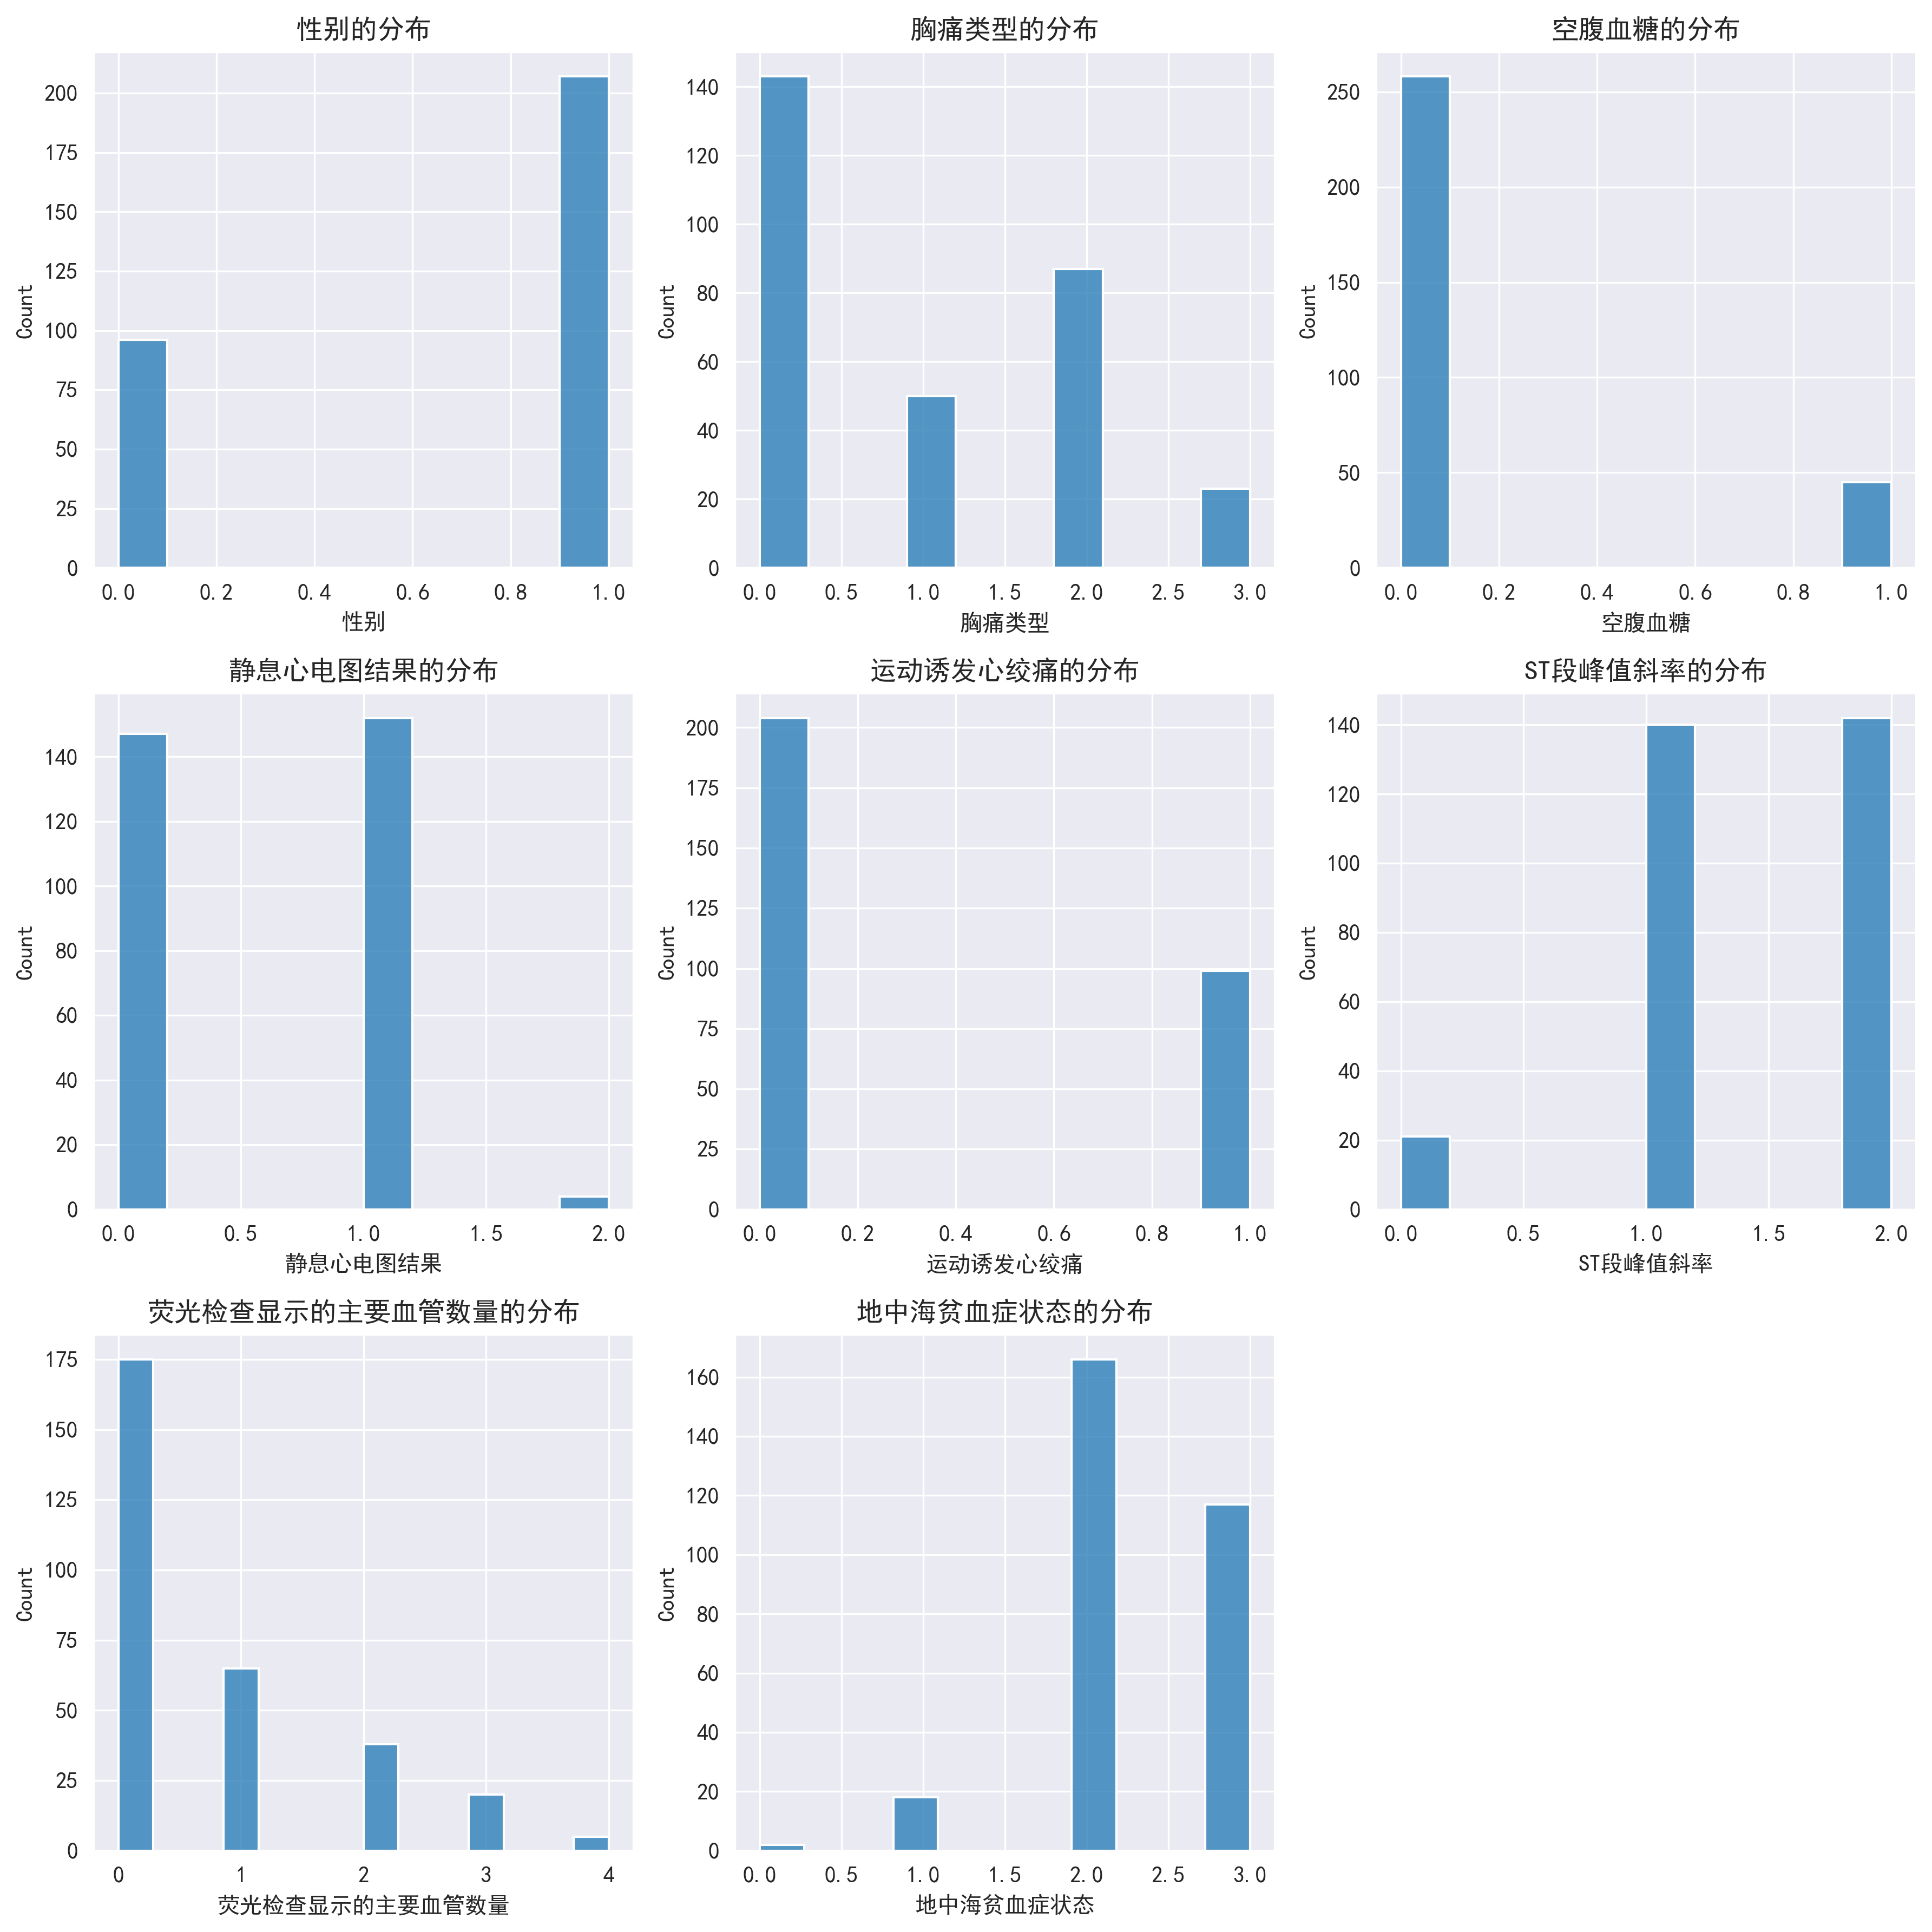

In [27]:
n_features = len(discrete_features_cn)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # 向上取整，或者math.ceil(n_features / n_cols)
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(12, 4 * n_rows),
    dpi=300
)
axes=axes.flatten()
for i,feature in enumerate(discrete_features_cn):
    sns.histplot(x=data_cn[feature],ax=axes[i])
    axes[i].set_title(f'{feature}的分布')
    axes[i].set_xlabel(feature)
    
for i in range(n_features,len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

---
## 特征与标签
### 连续变量


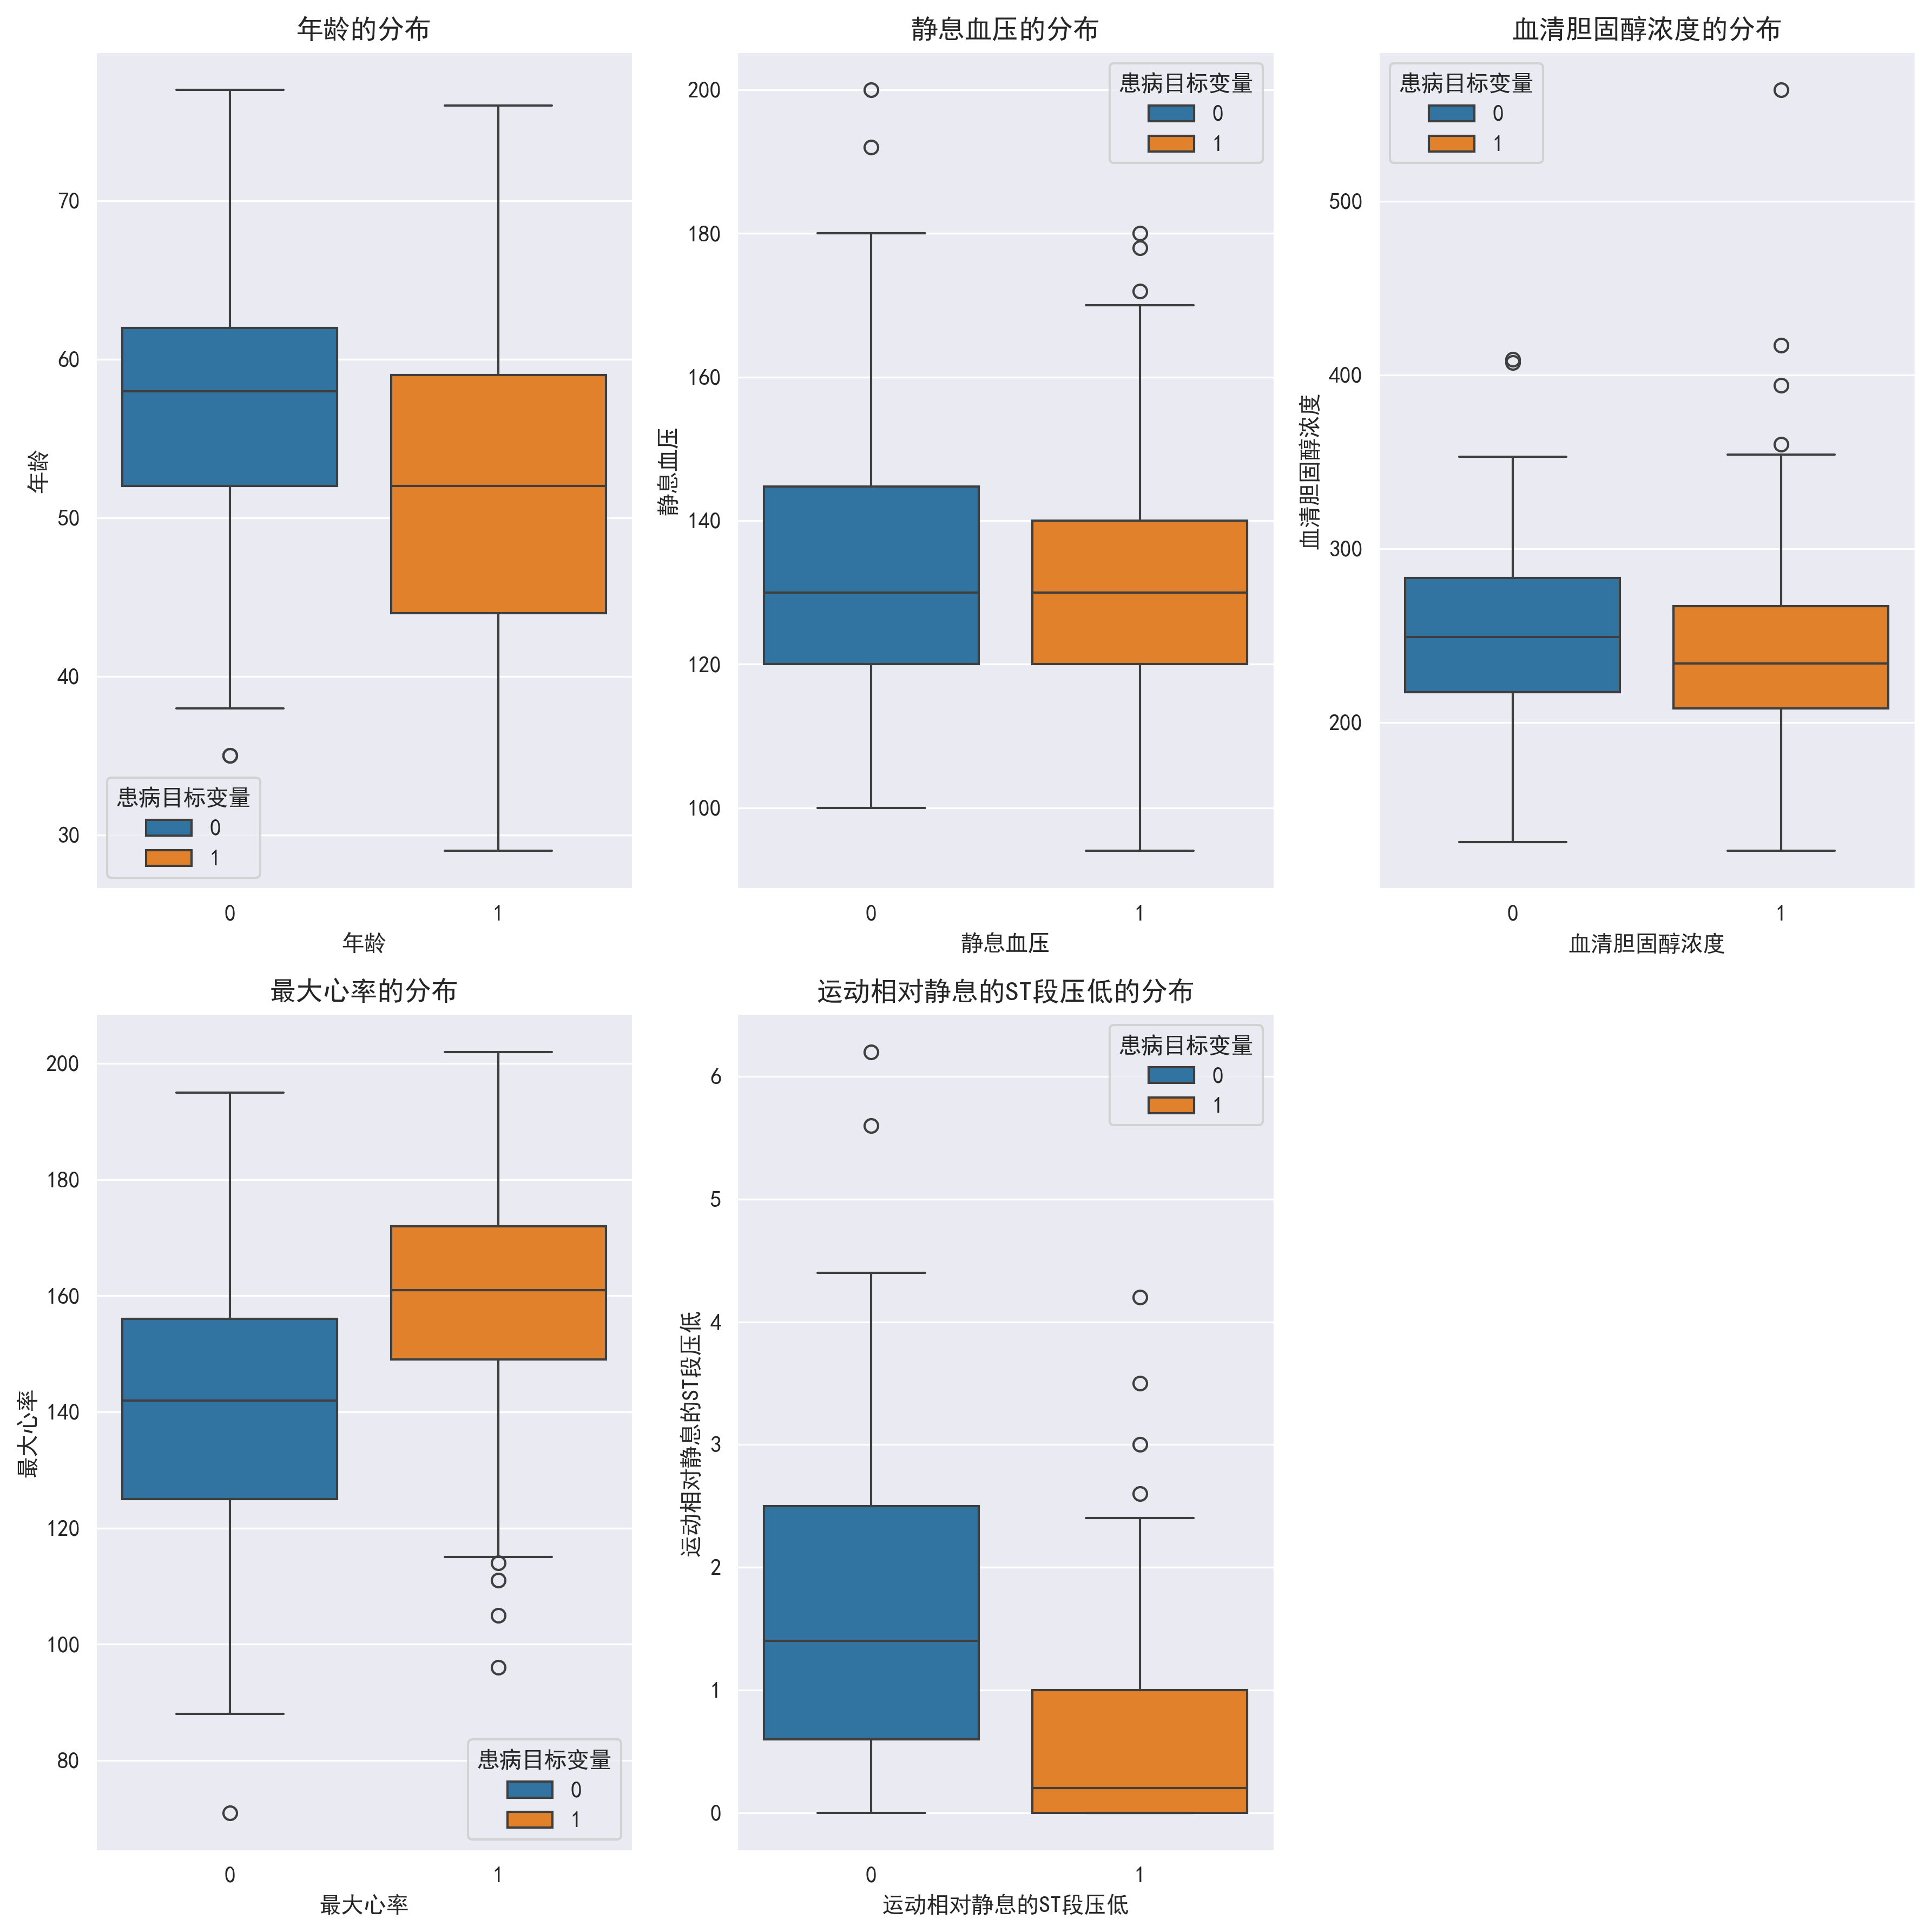

In [36]:
n_features=len(continuous_features_cn)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # 向上取整，或者math.ceil(n_features / n_cols)
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(12, 6 * n_rows),
    dpi=300
)
axes=axes.flatten()
for i,feature in enumerate(continuous_features_cn):
    sns.boxplot(x=data_cn['患病目标变量'],y=data_cn[feature],ax=axes[i],hue=data_cn['患病目标变量'])
    axes[i].set_title(f'{feature}的分布')
    axes[i].set_xlabel(feature)

for i in range(n_features,len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

---
### 离散变量

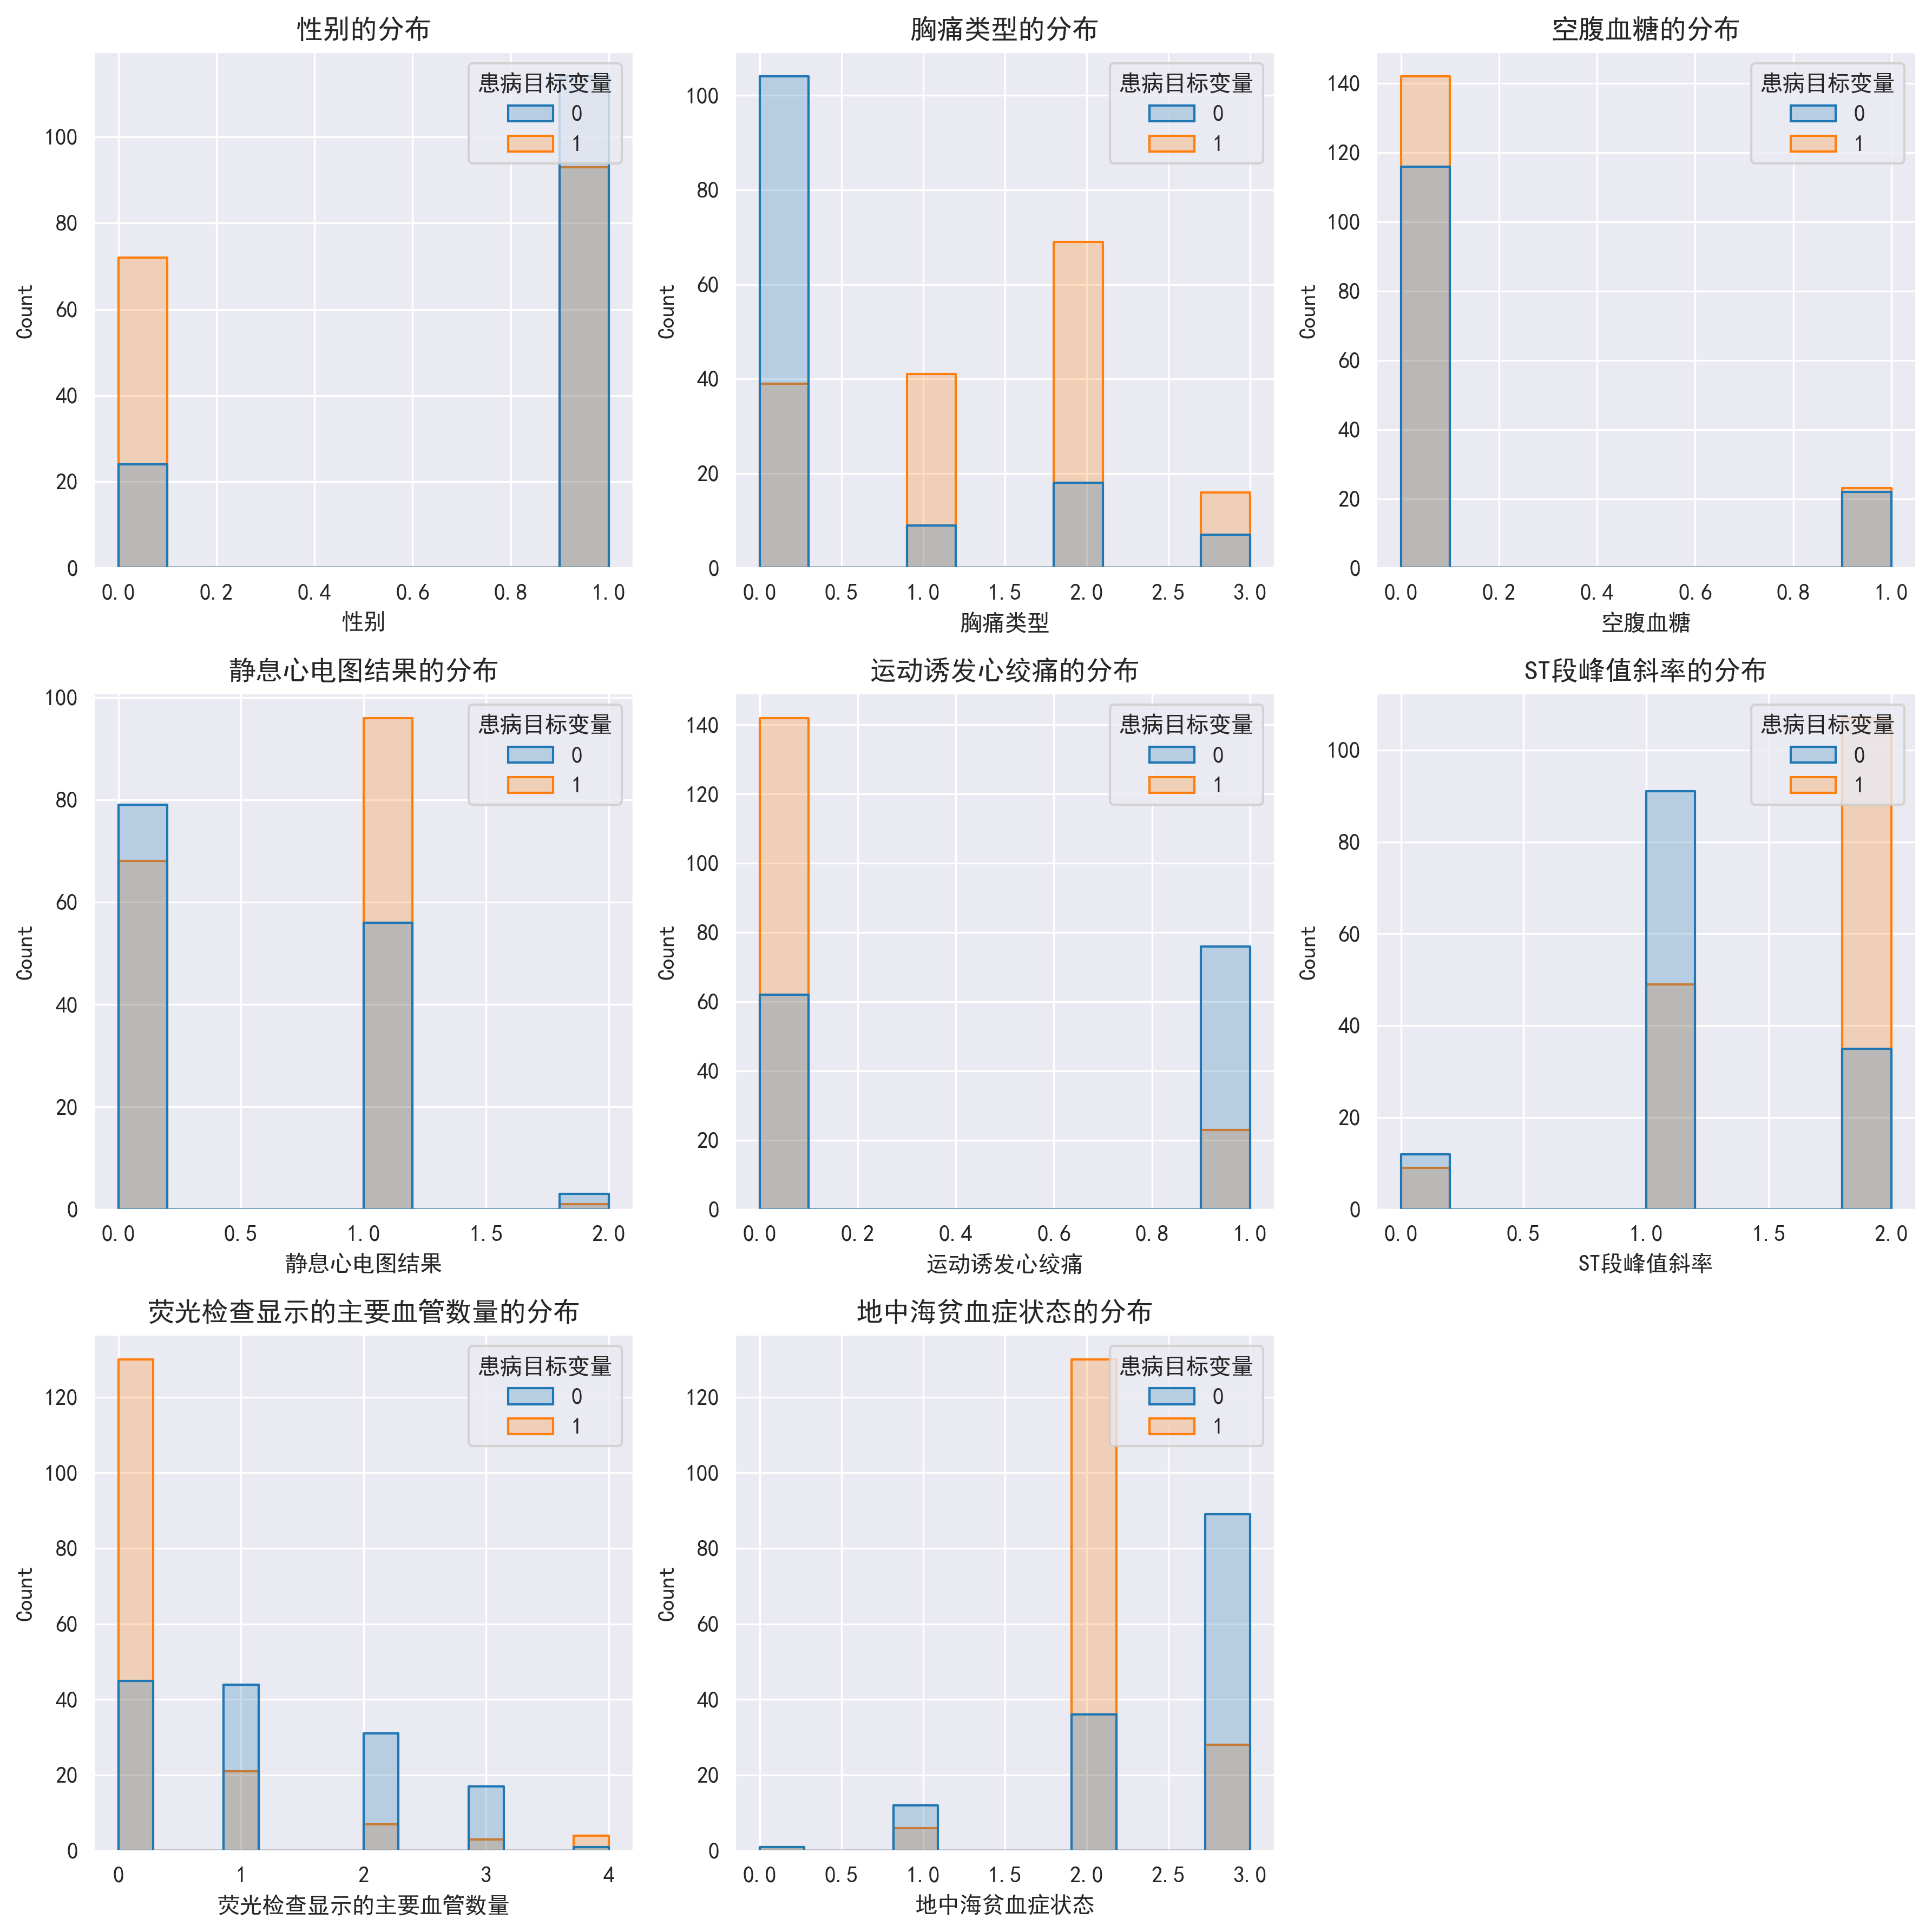

In [39]:
n_features = len(discrete_features_cn)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # 向上取整，或者math.ceil(n_features / n_cols)
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(12, 4 * n_rows),
    dpi=300
)
axes=axes.flatten()
for i,feature in enumerate(discrete_features_cn):
    sns.histplot(x=data_cn[feature],ax=axes[i],hue=data_cn['患病目标变量'],element='step')
    axes[i].set_title(f'{feature}的分布')
    axes[i].set_xlabel(feature)
    
for i in range(n_features,len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()